In [64]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Input_Matrix = pd.read_excel('Data/as of 2020 Historical Data.xlsx', sheet_name='Input Matrix')

Target_Matrix = pd.read_excel('/home/sai/Pyt-Ex/Data/as of 2020 Historical Data.xlsx', sheet_name='Target Matrix')


In [66]:
Input_Matrix

,Unnamed: 0,Unnamed: 1,Inputs (at Landfall),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,First Landfall Location,Unnamed: 8,Second Landfall Location,Unnamed: 10,Third Landfall Location,Unnamed: 12,Fourth Landfall Location,Unnamed: 14
0,Year,Storm,Population Affected,Pressure (mbar),Wind Speed (mph),Storm Surge (ft),Precip (inches),Latitude,Longtitude,Latitude,Longtitude,Latitude,Longtitude,Latitude,Longtitude
1,2020,Bertha,710000,1005,51.75,1.32,15,32.9,79.7,0,0,0,0,0,0
2,NaN,Cristobal,7200000,990,51.75,6.2,13.65,29.3,89.8,0,0,0,0,0,0
3,NaN,Fay,22500000,999,51.75,2.67,6.97,39.4,74.4,0,0,0,0,0,0
4,NaN,Hanna,2000000,973,92,6.24,15.49,26.8,97.3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,H. Earl,1600000,987,80.5,5.3,16.38,30.1,85.7,0,0,0,0,0,0
93,NaN,TS. Frances,17000000,990,51.75,5.1,11.38,28.2,96.9,0,0,0,0,0,0
94,NaN,H. Georges,11200000,964,103.5,9,38.46,24.5,81.8,30.4,88.9,0,0,0,0
95,NaN,TS. Hermine,2200000,1000,40.25,0,1,29.1,90.9,0,0,0,0,0,0


In [2]:
target_columns = ['Year', 'Storm', 'Ry_Damage', '2016_USD', 'Impact_Level', 'IL0', 'IL1', 'IL2', 'IL3', 'IL4', 'IL5', 'Check']

Target_Matrix.drop(['Unnamed: 11', 'Unnamed: 13'], axis=1, inplace=True)

Target_Matrix.set_axis(target_columns, axis=1, inplace=True)

Target_Matrix

,Year,Storm,Ry_Damage,2016_USD,Impact_Level,IL0,IL1,IL2,IL3,IL4,IL5,Check
0,2020,Bertha,NaN,0.000000e+00,0,1,0,0,0,0,0,0
1,NaN,Cristobal,3.100000e+08,2.666000e+08,2,0,0,1,0,0,0,2
2,NaN,Fay,2.200000e+08,1.892000e+08,2,0,0,1,0,0,0,2
3,NaN,Hanna,1.100000e+09,9.460000e+08,2,0,0,1,0,0,0,2
4,NaN,Isaias,4.800000e+09,4.128000e+09,3,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,H. Earl,7.900000e+07,1.374509e+08,2,0,0,1,0,0,0,2
92,NaN,TS. Frances,5.000000e+08,8.699422e+08,2,0,0,1,0,0,0,2
93,NaN,H. Georges,5.900000e+09,1.026532e+10,4,0,0,0,0,1,0,4
94,NaN,TS. Hermine,0.000000e+00,0.000000e+00,0,1,0,0,0,0,0,0


In [3]:
Target_Matrix.isnull().sum()

Year            72
Storm            0
Ry_Damage        1
2016_USD         1
Impact_Level     0
IL0              0
IL1              0
IL2              0
IL3              0
IL4              0
IL5              0
Check            0
dtype: int64

In [4]:
input_columns = ['Year', 'Storm', 'Population_Affected', 'Pressure(mbar)', 'Wind_Speed(mph)', 'Storm_Surge(ft)', 'Precip(inches)', 'First_Latitude', 'First_Longtitude', 'Second_Latitude', 'Second_Longtitude', 'Third_Latitude', 'Third_Longtitude', 'Fourth_Latitude', 'Fourth_Longtitude']

Input_Matrix.set_axis(input_columns, axis=1, inplace=True)

Input_Matrix.drop([0], inplace = True)

Input_Matrix.reset_index(drop=True, inplace=True)

Input_Matrix.drop(['Year', 'Storm'], axis=1, inplace=True)

Input_Matrix

,Population_Affected,Pressure(mbar),Wind_Speed(mph),Storm_Surge(ft),Precip(inches),First_Latitude,First_Longtitude,Second_Latitude,Second_Longtitude,Third_Latitude,Third_Longtitude,Fourth_Latitude,Fourth_Longtitude
0,710000,1005,51.75,1.32,15,32.9,79.7,0,0,0,0,0,0
1,7200000,990,51.75,6.2,13.65,29.3,89.8,0,0,0,0,0,0
2,22500000,999,51.75,2.67,6.97,39.4,74.4,0,0,0,0,0,0
3,2000000,973,92,6.24,15.49,26.8,97.3,0,0,0,0,0,0
4,56300000,986,92,6.3,8.85,33.9,78.5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1600000,987,80.5,5.3,16.38,30.1,85.7,0,0,0,0,0,0
92,17000000,990,51.75,5.1,11.38,28.2,96.9,0,0,0,0,0,0
93,11200000,964,103.5,9,38.46,24.5,81.8,30.4,88.9,0,0,0,0
94,2200000,1000,40.25,0,1,29.1,90.9,0,0,0,0,0,0


In [5]:
Input_Matrix.isnull().sum()

Population_Affected    0
Pressure(mbar)         0
Wind_Speed(mph)        0
Storm_Surge(ft)        0
Precip(inches)         0
First_Latitude         0
First_Longtitude       0
Second_Latitude        0
Second_Longtitude      0
Third_Latitude         0
Third_Longtitude       0
Fourth_Latitude        0
Fourth_Longtitude      0
dtype: int64

In [6]:
df = Input_Matrix
df['Impact_Level'] = Target_Matrix['Impact_Level'] 


<AxesSubplot:xlabel='Impact_Level', ylabel='count'>

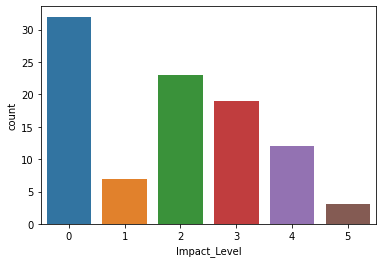

In [7]:
sns.countplot(x = 'Impact_Level', data=df) 

(array([7., 0., 1., 0., 5., 0., 4., 0., 2., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

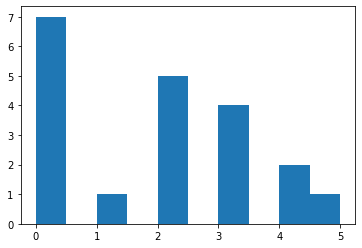

In [57]:
plt.hist(y_test)

In [58]:
y_test

array([4, 0, 0, 0, 0, 5, 0, 2, 3, 3, 1, 0, 2, 4, 0, 2, 3, 3, 2, 2])

In [8]:
class ClassifierDataset(Dataset):
    '''
    to set data in a block.
    this dataset will be used by the dataloader to pass the data
    into the model.
    X = float
    y = long
    '''
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [9]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [10]:
def get_class_distribution(obj):
    count_dict = {
        "rating_3": 0,
        "rating_4": 0,
        "rating_5": 0,
        "rating_6": 0,
        "rating_7": 0,
        "rating_8": 0,
    }
    
    for i in obj:
        if i == 0: 
            count_dict['rating_3'] += 1
        elif i == 1: 
            count_dict['rating_4'] += 1
        elif i == 2: 
            count_dict['rating_5'] += 1
        elif i == 3: 
            count_dict['rating_6'] += 1
        elif i == 4: 
            count_dict['rating_7'] += 1  
        elif i == 5: 
            count_dict['rating_8'] += 1              
        else:
            print("Check classes.")
            
    return count_dict

In [11]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))] 

class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 

class_weights_all = class_weights[target_list]

weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [12]:
BATCH_SIZE= 16

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=16)
test_loader = DataLoader(dataset=test_dataset, batch_size=16) 

In [67]:
from torch._C import device 
import torch
# torch.manual_seed(10)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from matplotlib import pyplot as plt

from pyt_ex import neural_net as neural_network 
import yaml

with open('config/Input.yaml') as File:
        dic = yaml.load(File, Loader=yaml.FullLoader)

plots = {}
for i in dic:
    plots[i] = {}
    ann = neural_network.Ann(dic[i])
    ann = ann.to(device)
#     ann.show()
    ann.train_val(train_dataloader=train_loader, val_dataloader=val_loader, test_dataloader=test_loader)

    plots[i]["train_acc_list"] = ann.train_acc_list
    plots[i]["val_acc_list"] = ann.val_acc_list
    plots[i]["train_loss_list"] = ann.train_loss_list
    plots[i]["val_loss_list"] = ann.val_loss_list
    plots[i]["Output"] = ann.Output


Begin_training


100%|██████████| 1000/1000 [00:08<00:00, 116.23it/s]


In [68]:
def model_plots(i):
    from matplotlib.gridspec import GridSpec
    fig = plt.figure(figsize=(20, 10))
    gs = GridSpec(nrows=2, ncols=2)

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.plot(plots[i]["train_acc_list"], label = 'train_acc_list')
    ax0.plot(plots[i]["val_acc_list"], label = 'val_acc_list')
    ax0.legend()
    ax0.set(xlabel='Iterations', ylabel='Accuracy')

    ax1 = fig.add_subplot(gs[1, 0])
    ax1.plot(plots[i]["train_loss_list"], label = 'train_loss_list')
    ax1.plot(plots[i]["val_loss_list"], label = 'val_loss_list')
    ax1.legend() 
    ax1.set(xlabel='Iterations', ylabel='CrossEntropyLoss')

    ax2 = fig.add_subplot(gs[:, 1])
    confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, plots[i]["Output"]))
    ax2 = sns.heatmap(confusion_matrix_df, annot=True, cmap='Blues')
    ax2.set(xlabel='Predicted Label', ylabel='True Label')
    plt.show()

In [69]:
models = [i for i in plots.keys()]


FIRST


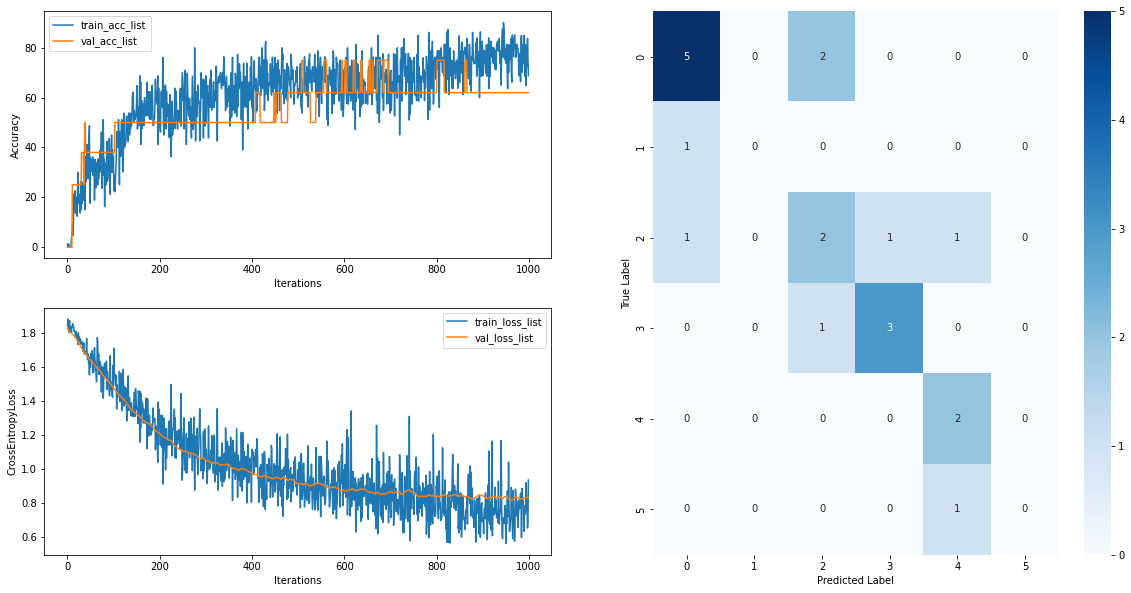

In [70]:
print(models[0])
model_plots(models[0])

SECOND


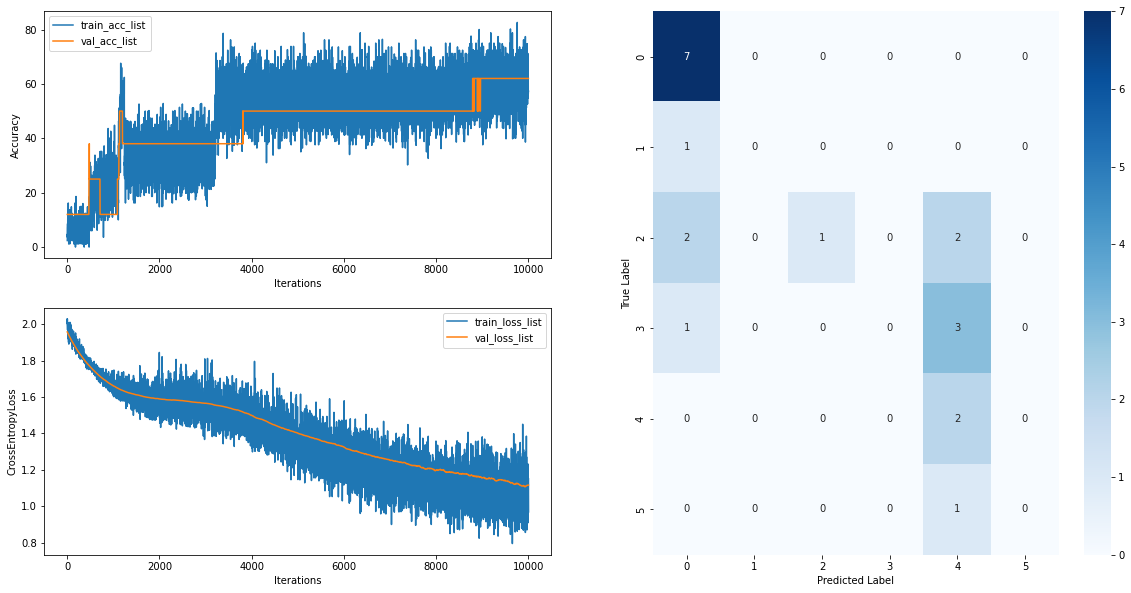

In [63]:
print(models[1])
model_plots(models[1])